In [72]:
import numpy as np

In [73]:
X = np.array([[1, 2], [2, 3], [3, 1], [2, 5], [4, 3]])
Y = np.array([1, 1, 1, 0, 0])

X = np.hstack((np.ones((X.shape[0], 1)), X))
X

array([[1., 1., 2.],
       [1., 2., 3.],
       [1., 3., 1.],
       [1., 2., 5.],
       [1., 4., 3.]])

In [74]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [75]:
def loss(theta, X, Y):
    L = 0
    for x, y in zip(X, Y):
        if y == 0:
            L += - np.log(1 - sigmoid(np.dot(theta, x)))
        else:
            L += - np.log(sigmoid(np.dot(theta, x)))
    return L / len(Y)

In [76]:
def gradient(theta, X, Y):
    G = 0
    for x, y in zip(X, Y):
        G += (sigmoid(np.dot(theta, x)) - y) * x
    return G / len(Y)

In [77]:
# Phương pháp hướng giảm
initial_theta = np.zeros(X.shape[1])
learning_rate = 0.1
tolerance = 1e-5
max_iters = 1e4

theta = initial_theta
num_iters = 0
loss_history = [loss(theta,X_SGD,Y_SGD)]

while True:
    num_iters += 1
    index = np.random.choice(range(len(X)), 2 , replace=False)
    # indexs = np.random.choice(range(len(Y)), 2 , replace=False)
    X_SGD = X[index, :]
    Y_SGD = Y[index,]
    theta -= learning_rate * gradient(theta,X_SGD,Y_SGD)
    loss_history.append(loss(theta,X_SGD,Y_SGD))
    if np.linalg.norm(gradient(theta,X_SGD,Y_SGD)) < tolerance or num_iters == max_iters:
        break

In [78]:
num_iters

10000

In [79]:
theta

array([16.63412867, -2.92190951, -2.83418195])

In [80]:
loss_history

[np.float64(0.6931471805599453),
 np.float64(0.6403611497285044),
 np.float64(0.6633653243829789),
 np.float64(0.2090466756385839),
 np.float64(0.13322836844743174),
 np.float64(0.9251140736799011),
 np.float64(0.6117343568731504),
 np.float64(0.6231025237069929),
 np.float64(0.6731383370406739),
 np.float64(0.5503143018923387),
 np.float64(0.4200112191463995),
 np.float64(0.35271879177295284),
 np.float64(0.7832925524671019),
 np.float64(0.3352845656607673),
 np.float64(0.25430454878210607),
 np.float64(0.8258547114207377),
 np.float64(0.70445490003632),
 np.float64(0.26275665290335765),
 np.float64(0.5927421169289655),
 np.float64(0.5930788474364477),
 np.float64(0.587754511506932),
 np.float64(0.5803028235646988),
 np.float64(0.569018273473656),
 np.float64(0.1665364910459744),
 np.float64(0.11466638006357968),
 np.float64(0.7603316462182821),
 np.float64(0.130861868591587),
 np.float64(0.8714872639780364),
 np.float64(0.5460793794782275),
 np.float64(0.5847372147453513),
 np.float6

In [81]:
x_pred = np.array([1, 1, 4])

In [82]:
prob_pred = sigmoid(np.dot(theta, x_pred))
prob_pred

np.float64(0.9149392030868718)

In [83]:
y_pred = 1 if prob_pred >= 0.5 else 0
y_pred

1

In [84]:
a = - theta[1] / theta[2]
b = - theta[0] / theta[2]
a, b

(np.float64(-1.0309533960182173), np.float64(5.869111072804784))

In [85]:
import matplotlib.pyplot as plt

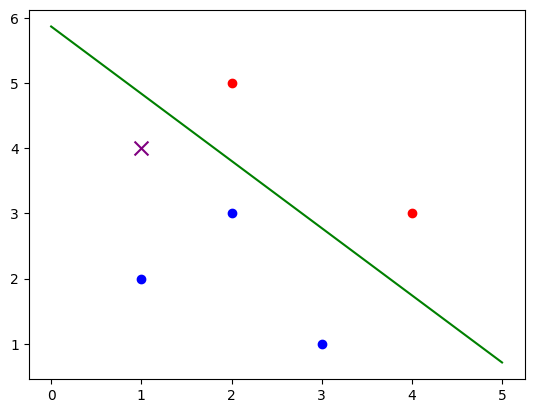

In [86]:
plt.figure()
plt.scatter(X[Y == 1][:, 1], X[Y == 1][:, 2], color = 'blue')
plt.scatter(X[Y == 0][:, 1], X[Y == 0][:, 2], color = 'red')
plt.scatter(x_pred[1], x_pred[2], color = 'purple', marker = 'x', s=100)


X1 = np.linspace(0, 5, 100)
X2 = a*X1 + b
plt.plot(X1, X2, color = 'green')
plt.show()